In [2]:
# ---------------------------
# 1. Imports
# ---------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
# For interactive plots (optional)
import plotly.express as px

# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
# ---------------------------
# 2. Load the Data
# ---------------------------

# Define file path
DATA_PATH = "../data/raw/WHO_PM25_urban_2022.csv"

# Load CSV
try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please make sure the CSV is in data/raw/")
    raise

# Preview
df.head()

# I want to add a column called FactValueSpread that contains the difference (FactValueNumericHigh-FactValueNumericLow) for each row.
df['FactValueSpread'] = df['FactValueNumericHigh'] - df['FactValueNumericLow']
# Display the first few rows to verify the new column
print("✅ FactValueSpread column added.")
df.head()

✅ Data loaded successfully.
✅ FactValueSpread column added.


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified,FactValueSpread
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.01,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12T05:00:00.000Z,7.45
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,True,Residence Area Type,Rural,RESIDENCEAREATYPE_RUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12T05:00:00.000Z,5.11
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.06,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12T05:00:00.000Z,0.66
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,True,Residence Area Type,Total,RESIDENCEAREATYPE_TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.08,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12T05:00:00.000Z,6.13
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,True,Residence Area Type,Towns,RESIDENCEAREATYPE_TOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.09,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12T05:00:00.000Z,4.23


In [5]:
# ---------------------------
# 3. Quick Overview
# ---------------------------

print(f"\n🧾 Number of rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n📄 Column names:")
print(df.columns.tolist())

# Check datatypes
print("Preview of data types:")
df.dtypes

# Summary info on data types and missing values
print("\n📊 DataFrame Info:", df.info())

# Count unique values in each column
print("\nUnique Values Per Column:\n", df.nunique())

# I want to see if FactValueNumericHigh is the highest value in FactValue for a given Location
# As an example I will use Armenia
# Filter for Armenia with columns: 'Location', 'Period', 'FactValueNumeric', 'FactValueNumericHigh'
armenia_data = df[df['Location'] == 'Armenia'][['Location', 'Period', 'FactValueNumeric', 'FactValueNumericHigh']]
print("\n📍 Armenia Data Preview:\n", armenia_data)
# Check if FactValueNumericHigh is the highest value
is_highest = armenia_data['FactValueNumericHigh'].max() == armenia_data['FactValueNumeric'].max()
print(f"\nIs FactValueNumericHigh the highest value for Armenia? {is_highest}")

# I want to check if FactValueNumericHigh is the highest value in FactValueNumeric for a given ParentLocation
def is_highest_value(df, parent_location):
    """
    Check if FactValueNumericHigh is the highest value in FactValueNumeric for a given ParentLocation.
    """
    location_data = df[df['ParentLocation'] == parent_location]
    max_high = location_data['FactValueNumericHigh'].max()
    max_numeric = location_data['FactValueNumeric'].max()
    return max_high == max_numeric
# Example usage for Armenia
armenia_highest_check = is_highest_value(df, 'Armenia')
print(f"\nIs FactValueNumericHigh the highest value for Armenia's ParentLocation? {armenia_highest_check}")


🧾 Number of rows: 9450, Columns: 35

📄 Column names:
['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified', 'FactValueSpread']
Preview of data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               9450 non-null   object 
 1   Indicator                   9450 non-null  

In [6]:
# ---------------------------
# 4. Descriptive Statistics
# ---------------------------

df.describe(include='all')

# Check nulls
print("\n🧼 Missing values per column:")
print(df.isnull().sum())


🧼 Missing values per column:
IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefi

In [7]:
# ---------------------------
# 5. Unique Countries and Years
# ---------------------------

if 'Country' in df.columns:
    print(f"\n🌍 Number of unique countries: {df['Country'].nunique()}")
    print(df['Country'].unique()[:10])

if 'Year' in df.columns:
    print(f"\n📅 Year range: {df['Year'].min()} to {df['Year'].max()}")

if 'Location' in df.columns:
    print(f"\n📍 Number of unique locations: {df['Location'].nunique()}")
    print(df['Location'].unique()[:10])

if 'ParentLocation' in df.columns:
    print(f"\n🌐 Number of unique parent locations: {df['ParentLocation'].nunique()}")
    print(df['ParentLocation'].unique()[:10])

# Print the first 10 rows in alphabetical order of the Location column
print("\n📍 First 10 locations in alphabetical order:"
      "\n", df['Location'].sort_values().unique()[:10])


📍 Number of unique locations: 195
['Kenya' 'Trinidad and Tobago'
 'United Kingdom of Great Britain and Northern Ireland' 'Grenada' 'Brazil'
 'Denmark' 'Russian Federation' 'Spain' 'France' 'Guyana']

🌐 Number of unique parent locations: 6
['Africa' 'Americas' 'Europe' 'Western Pacific' 'South-East Asia'
 'Eastern Mediterranean']

📍 First 10 locations in alphabetical order:
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']


Created 6 filtered DataFrames, one for each ParentLocation.


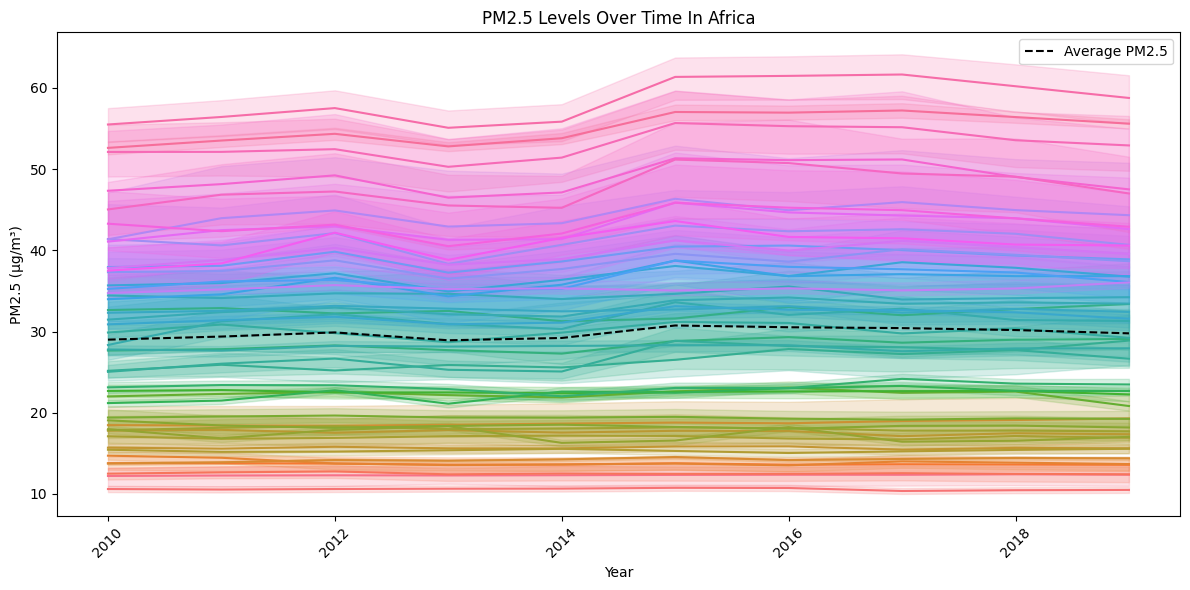

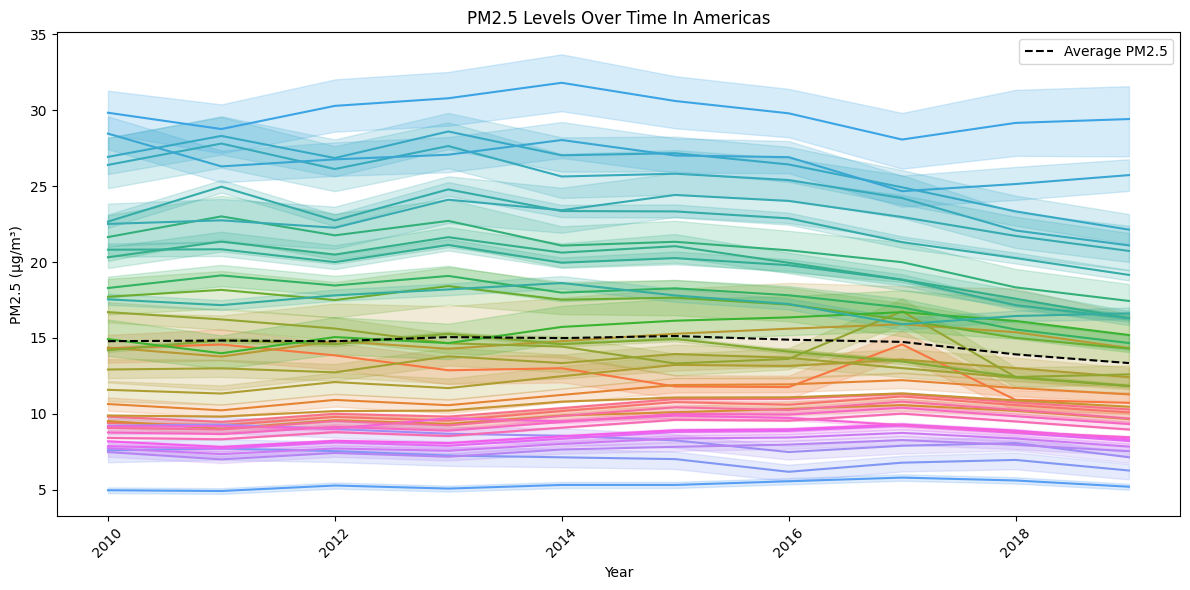

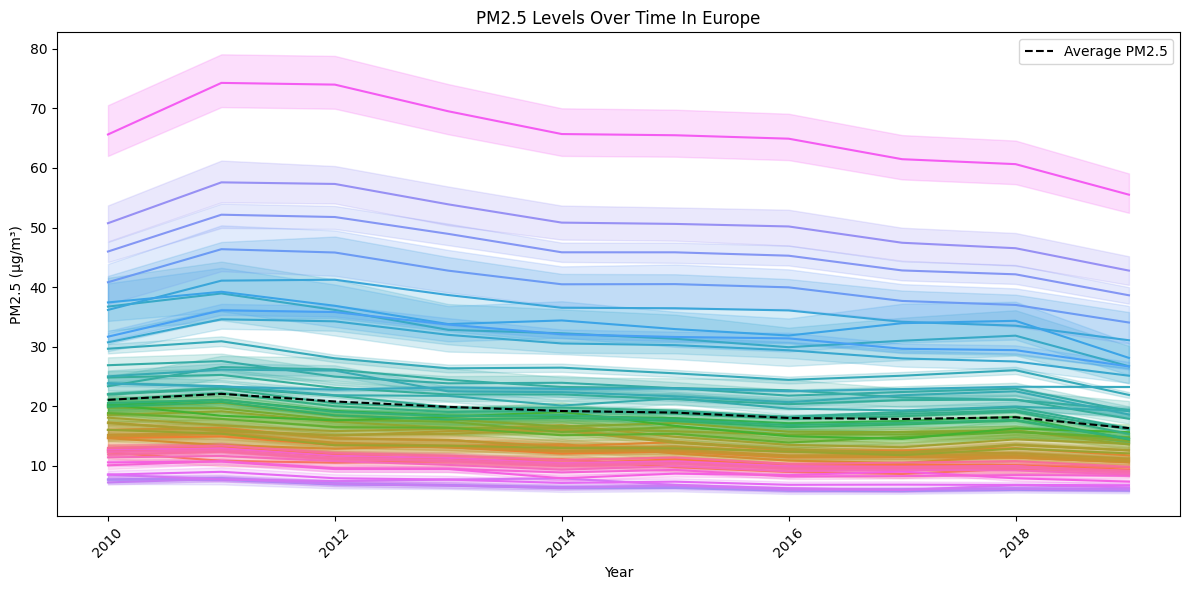

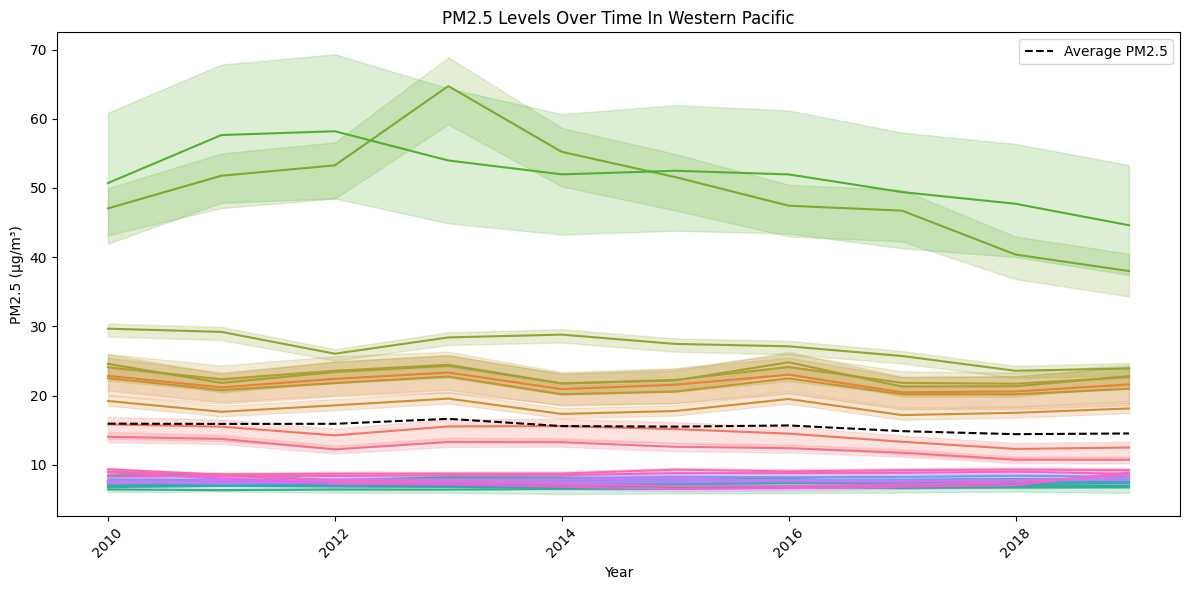

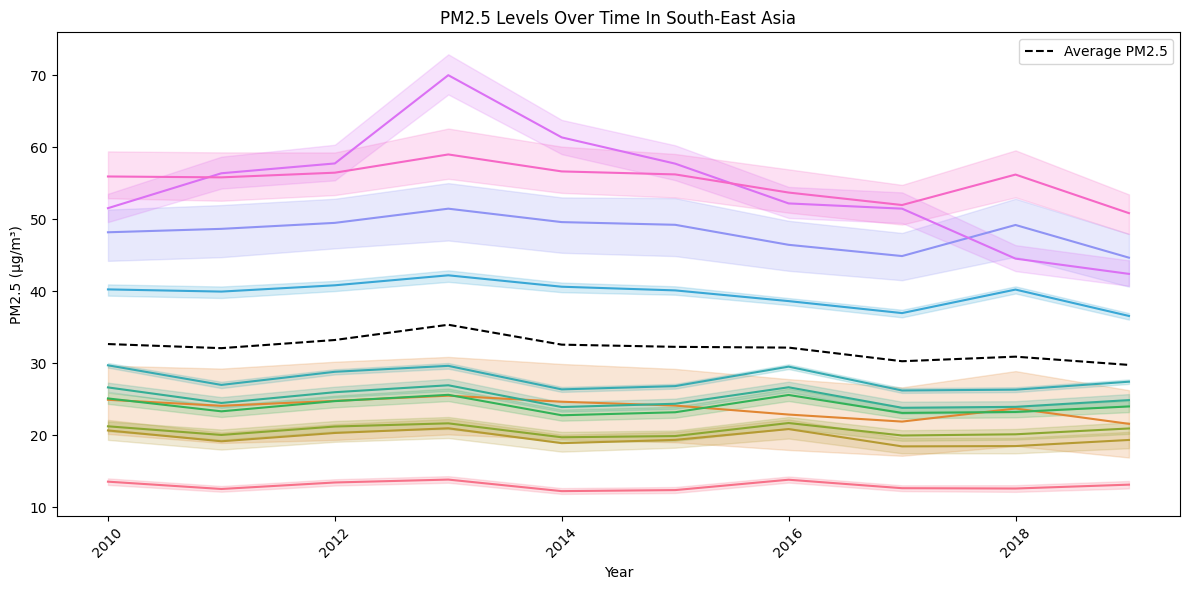

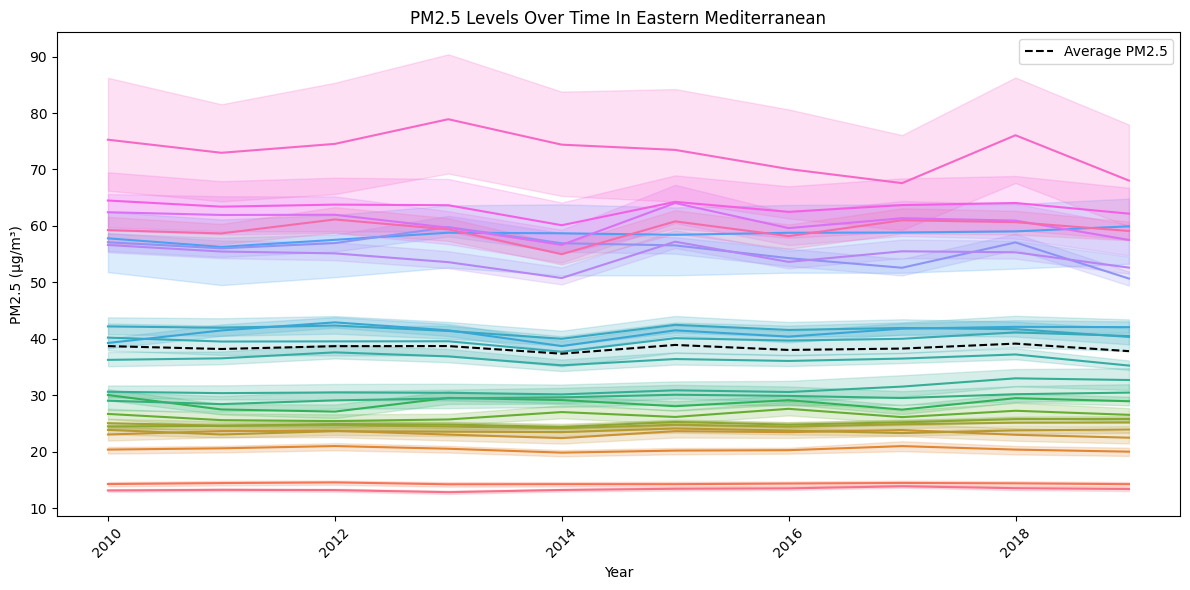


📉 Top 10 rows with smallest FactValueSpread:
                       Location  Period  FactValueSpread
3662  United States of America    2016             0.19
786   United States of America    2019             0.21
3606  United States of America    2016             0.21
3656  United States of America    2016             0.21
3687  United States of America    2016             0.21
4666  United States of America    2015             0.22
747   United States of America    2019             0.22
799   United States of America    2019             0.22
6565  United States of America    2013             0.23
1754  United States of America    2018             0.23

📈 Top 10 rows with largest FactValueSpread:
      Location  Period  FactValueSpread
620     Congo    2019           170.10
3453    Congo    2016           166.42
1563    Congo    2018           165.53
6298    Congo    2013           165.23
8186    Congo    2011           165.11
9133    Congo    2010           163.42
7229    Congo    2

In [8]:
# ---------------------------
# 6. Data Visualization
# ---------------------------


# Data Filtered by Parent Location
# Get the unique values in the ParentLocation column
unique_parent_locations = df['ParentLocation'].unique()

# Create a list of filtered DataFrames
filtered_dfs = [df[df['ParentLocation'] == location] for location in unique_parent_locations]

# Optionally, print the number of DataFrames created
print(f"Created {len(filtered_dfs)} filtered DataFrames, one for each ParentLocation.")
easterMediterranean_df = df[df['ParentLocation'] == 'Eastern Mediterranean Region']

# ---------------------------
# Plot PM2.5 Levels by Period for all Locations per Parent Location, one Parent Location at a time
# ---------------------------

for location in unique_parent_locations:
    filtered_rows = df[df['ParentLocation'] == location]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_rows, x='Period', y='FactValueNumeric', hue='Location', legend=False)
    plt.title('PM2.5 Levels Over Time In {Location}'.format(Location=location))
    plt.xlabel('Year')
    plt.ylabel('PM2.5 (µg/m³)')
    # Plot the average PM2.5 line over Period for the current Parent Location
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Calculate and plot the average PM2.5 for the current Parent Location
    average_pm25 = filtered_rows.groupby('Period')['FactValueNumeric'].mean().reset_index()
    sns.lineplot(data=average_pm25, x='Period', y='FactValueNumeric', color='black', label='Average PM2.5', linestyle='--')
    plt.legend()
    plt.show()

# ---------------------------
# Find the Top 10 rows with Smallest FactValueSpread
# ---------------------------
top_10_smallest_spread = df.nsmallest(10, 'FactValueSpread')
print("\n📉 Top 10 rows with smallest FactValueSpread:" 
      "\n", top_10_smallest_spread[['Location', 'Period', 'FactValueSpread']])
# ---------------------------
# Find the Top 10 rows with Largest FactValueSpread
# ---------------------------
top_10_largest_spread = df.nlargest(10, 'FactValueSpread')
print("\n📈 Top 10 rows with largest FactValueSpread:" 
      "\n", top_10_largest_spread[['Location', 'Period', 'FactValueSpread']])
# ---------------------------
# Save the modified DataFrame with the new column
# ---------------------------
output_path = "../data/processed/WHO_PM25_urban_2022_with_spread.csv"
df.to_csv(output_path, index=False)
print(f"✅ Data saved to {output_path}")

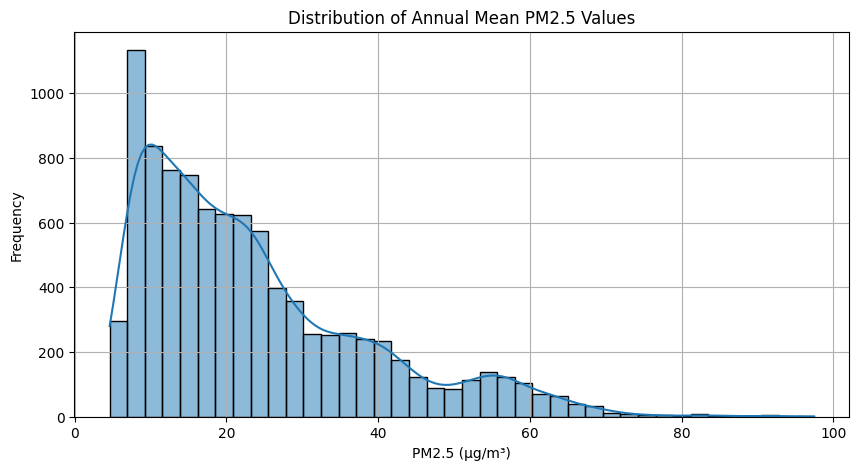

/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_95988/4139877332.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Reds_r')


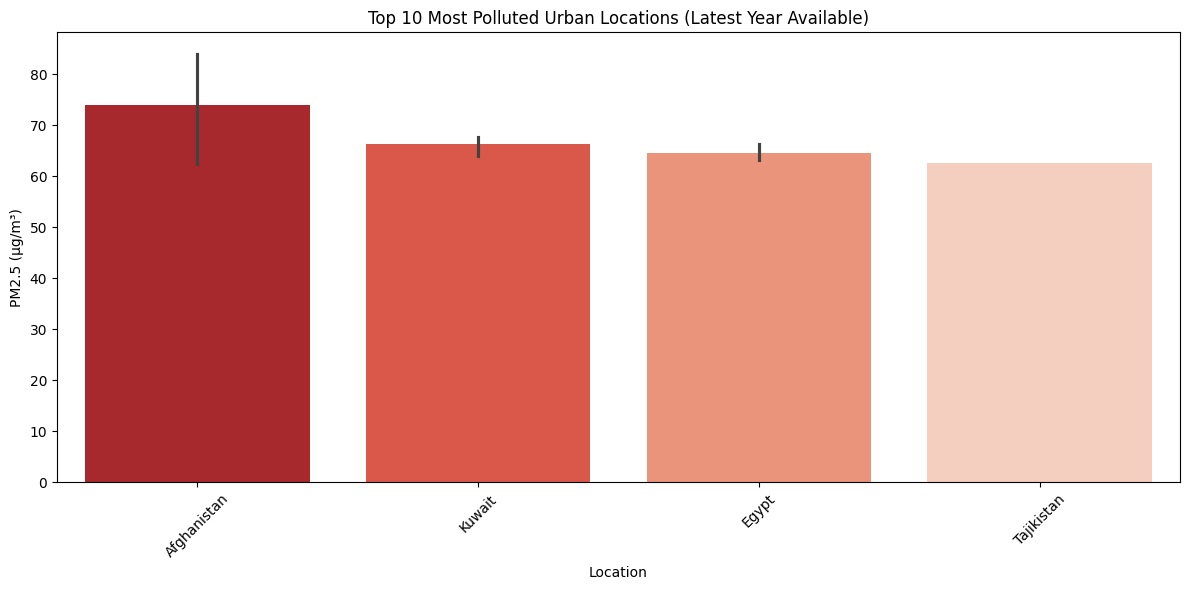

Creating choropleth for period: 2010
Creating choropleth for period: 2011
Creating choropleth for period: 2012
Creating choropleth for period: 2013
Creating choropleth for period: 2014
Creating choropleth for period: 2015
Creating choropleth for period: 2016
Creating choropleth for period: 2017
Creating choropleth for period: 2018
Creating choropleth for period: 2019
✅ GIF saved as pm25_choropleth_animation.gif


In [9]:
# ---------------------------
# 6. Visual Exploration
# ---------------------------

pm_col = 'FactValueNumeric'

# Distribution of PM2.5 values
plt.figure(figsize=(10, 5))
sns.histplot(df[pm_col], bins=40, kde=True)
plt.title("Distribution of Annual Mean PM2.5 Values")
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 10 most polluted locations (latest year only)
latest_year = df[df['IsLatestYear'] == 1]
top_locations = latest_year.sort_values(by=pm_col, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Reds_r')
plt.title("Top 10 Most Polluted Urban Locations (Latest Year Available)")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interactive choropleth (if 'Location' is mappable to country names)
# Note: Requires cleaning or standardizing country/location names first
choropleth_df = df.groupby('Location')[pm_col].mean().reset_index()
fig = px.choropleth(
    choropleth_df,
    locations="Location",
    locationmode="country names",  # Might need to adjust based on real values
    color=pm_col,
    color_continuous_scale="Viridis",
    title="Average Urban PM2.5 Concentration by Location"
)
fig.show()

# Interactive choropleth (if 'Location' is mappable to country names)
# Note: Requires cleaning or standardizing country/location names first
# create one map per Period
fig_list = []
# Determine the global min and max for the color scale
global_min = df['FactValueNumeric'].min()
global_max = 0.90*df['FactValueNumeric'].max()

for period in sorted(df['Period'].unique()):
    print(f"Creating choropleth for period: {period}")
    choropleth_df = df[df['Period'] == period].groupby('Location')[pm_col].mean().reset_index()
    fig = px.choropleth(
        choropleth_df,
        locations="Location",
        locationmode="country names",  # Might need to adjust based on real values
        color=pm_col,
        color_continuous_scale="Viridis",
        range_color=(global_min, global_max),  # Set consistent color scale
        title=f"Average Urban PM2.5 Concentration by Location for {period}"
    )
    fig_list.append(fig)
    # Save each figure as a PNG file
    fig.write_image(f"pm25_choropleth_{period}.png")

# Create a GIF from the saved PNG files
from PIL import Image
png_files = [f"pm25_choropleth_{period}.png" for period in sorted(df['Period'].unique())]
images = [Image.open(png) for png in png_files]
gif_path = "pm25_choropleth_animation.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=1000, loop=0)
print(f"✅ GIF saved as {gif_path}")


In [10]:
# ---------------------------
# 7. Save Interim Version
# ---------------------------

interim_path = "../data/interim/pm25_explored.csv"
df.to_csv(interim_path, index=False)
print(f"\n💾 Interim file saved to: {interim_path}")



💾 Interim file saved to: ../data/interim/pm25_explored.csv


In [11]:
import plotly.express as px

# Determine the global min and max for the color scale
global_min = df['FactValueNumeric'].min()
global_max = df['FactValueNumeric'].max()

# Create one choropleth per Period with a consistent color scale
fig_list = []
for period in sorted(df['Period'].unique()):
    print(f"Creating choropleth for period: {period}")
    
    # Filter data for the current period
    choropleth_df = df[df['Period'] == period].groupby('Location')['FactValueNumeric'].mean().reset_index()
    
    # Create the choropleth with a fixed color scale
    fig = px.choropleth(
        choropleth_df,
        locations="Location",
        locationmode="country names",  # Adjust based on your data
        color="FactValueNumeric",
        color_continuous_scale="Viridis",
        range_color=(global_min, global_max),  # Set consistent color scale
        title=f"Average Urban PM2.5 Concentration by Location for {period}"
    )
    fig_list.append(fig)

# Display the first figure as an example
fig_list[0].show()

Creating choropleth for period: 2010
Creating choropleth for period: 2011
Creating choropleth for period: 2012
Creating choropleth for period: 2013
Creating choropleth for period: 2014
Creating choropleth for period: 2015
Creating choropleth for period: 2016
Creating choropleth for period: 2017
Creating choropleth for period: 2018
Creating choropleth for period: 2019
